In [2]:
"""
Para roda no drive descomente a linha que instala a biblioteca de controle reinicie o kernel e rode novamente
"""

#pip install control

import numpy as np
import control.matlab as m
import matplotlib.pyplot as plt

from pathlib import Path
from itertools import combinations_with_replacement

IMAGES = Path('images')


# Questão 1

G(s) = 
    35
----------
13.5 s + 1



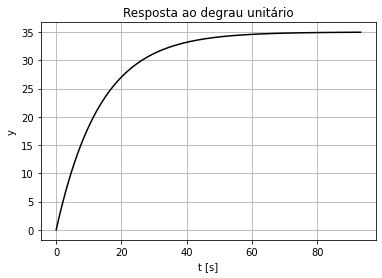

In [3]:
# Dados fornecidos
TD = 2
T1 = 13.5
K  = 35

# Planta Contínua 
# num, den = m.pade(T =2)
Gs = m.tf(K, [T1, 1])
print(f'G(s) = {Gs}')
 
y, t = m.step(Gs)
plt.plot(t,y, 'k')

plt.xlabel('t [s]')
plt.ylabel('y')
plt.title('Resposta ao degrau unitário')

plt.grid()
if not Path(IMAGES, 'step_response.png').exists():
    plt.savefig(f'{IMAGES}/step_response.png', dpi=720, format = 'png')
plt.show()

# Questão 2

Ts < 0.772 s
Ts    = 1.157	->	Qte. de Pontos = 5	->	Poles = [-1.95793926+0.j]
Ts    = 0.772	->	Qte. de Pontos = 7	->	Poles = [-1.+0.j]
Ts    = 0.54	->	Qte. de Pontos = 11	->	Poles = [-0.41195685+0.j]
Ts    = 0.394	->	Qte. de Pontos = 15	->	Poles = [-0.03428019+0.j]
Ts    = 0.385	->	Qte. de Pontos = 15	->	Poles = [-0.01228885+0.j]
Ts    = 0.077	->	Qte. de Pontos = 77	->	Poles = [0.79481667+0.j]


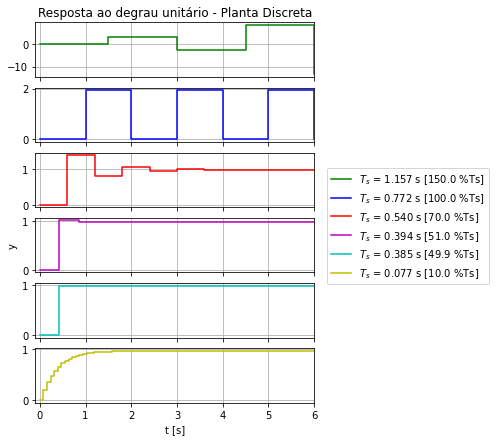

In [4]:
# Planta Discreta
a  = 1/13.5
Ts = -np.log((K-1)/(K+1))/a
print(f'Ts < {round(Ts,3)} s')

Tsvet = [1.5*Ts,Ts, 0.7*Ts, 0.51*Ts, 0.499*Ts, 0.1*Ts]
color = ['g','b','r','m', 'c','y', 'k', 'gray']

with plt.rc_context({'figure.figsize':(5,7)}):
    fig, axes = plt.subplots(len(Tsvet),1)

    tfinal = 6
    for i, ax in enumerate(axes):
        z = m.tf('z')
        Gz = K*(1 - np.exp(-a*Tsvet[i]))/(z - np.exp(-a*Tsvet[i]))
        Gzmf = m.feedback(Gz, 1)
        
        qteT = int(tfinal/Tsvet[i])
        T = np.linspace(0,tfinal,qteT) 
        y, t = m.step(Gzmf, T)

        ax.step(t,y,color[i],where = 'post',label = f'$T_s$ = {round(Tsvet[i],3):.3f} s [{round(100*Tsvet[i]/Ts,1)} %Ts]')
        ax.set_xlim([-.1,tfinal])
        if i==0: 
            ax.set_title('Resposta ao degrau unitário - Planta Discreta')
        if not i==len(axes)-1: 
            ax.set_xticklabels([])
        ax.grid()

        print(f'Ts    = {round(Tsvet[i],3)}\t->\tQte. de Pontos = {len(t)}\t->\tPoles = {m.pole(Gzmf)}')

    axes[-1].set_xlabel('t [s]')
    axes[3].set_ylabel('y')
    fig.legend(bbox_to_anchor = (1.4, 0.6))
    if not Path(IMAGES, 'step_response_discrete.png').exists():
        fig.savefig(f'{IMAGES}/step_response_discrete.png', dpi=720, format = 'png', bbox_inches = 'tight')

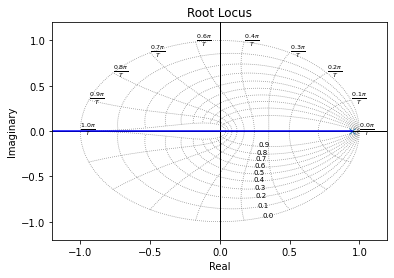

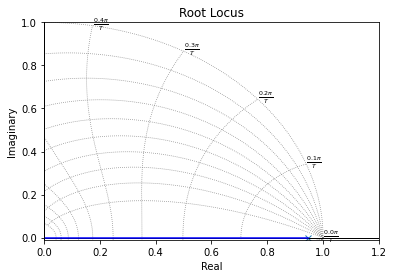

A planta e seu respectivo polo para Ts = 0.7716 s é:
G(z) = 
  1.944
----------
z - 0.9444

dt = 0.7716385868393066

z = [0.94444444+0.j]


In [5]:
Gz      = m.tf(K*(1 - np.exp(-a*Ts)), [1, -np.exp(-a*Ts)], Ts)
lim     = [-1.2,1.2]
lim2    = [0,1.2]
lim3    = [-0.01,1]

m.rlocus(Gz, grid = True, plotstr = 'b')
plt.gca().axis('auto')
plt.xlim(lim)
plt.ylim(lim)
if not Path(IMAGES, 'root_locus.png').exists():
    plt.savefig(f'{IMAGES}/root_locus.png', dpi=720, format = 'png')
plt.show()

m.rlocus(Gz, grid = True, plotstr = 'b')
plt.gca().axis('auto')
plt.xlim(lim2)
plt.ylim(lim3)
if not Path(IMAGES, 'root_locus2.png').exists():
    plt.savefig(f'{IMAGES}/root_locus2.png', dpi=720, format = 'png')
plt.show()

print(f'A planta e seu respectivo polo para Ts = {round(Ts,4)} s é:')
print(f'G(z) = {Gz}')
print(f'z = {m.pole(Gz)}')

# Questão 3

Gz = 
  0.3978
----------
z - 0.9886

dt = 0.15432771736786133

Tr = 29.631 s


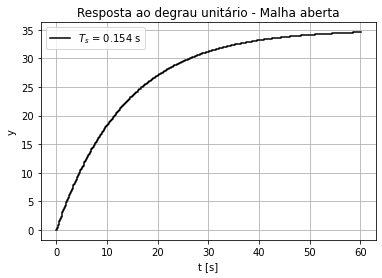

In [6]:
# Tempo de amostragem e resposta da planta discreta em malha aberta
Tsf = 0.2*Ts

Gz = m.c2d(Gs, Tsf, 'zoh')
Trz = m.stepinfo(Gz,60)['RiseTime']
print(f'Gz = {Gz}')
print(f'Tr = {round(Trz,3)} s')

y,t = m.step(Gz, 60)
plt.step(t,y, 'k', where = 'post', label = f'$T_s$ = {round(Tsf, 3)} s')
plt.title('Resposta ao degrau unitário - Malha aberta')
plt.xlabel('t [s]')
plt.ylabel('y')

plt.grid()
plt.legend()
plt.show()

#### 3.1 Sintonia por Ziegler-Nichols

---------------Controlador: P---------------
Kp = 0.193 | Ti = 0.0 | Td = 0.0

C(s) = 
0.1929
------
  1

Gma(s) = 
   6.75
----------
13.5 s + 1

Gma(z) = 
 0.07672
----------
z - 0.9886

dt = 0.15432771736786133

Gmf(z) = 
 0.07672
----------
z - 0.9119

dt = 0.15432771736786133

---------------Controlador: PI---------------
Kp = 0.174 | Ti = 6.6 | Td = 0.0

C(s) = 
1.146 s + 0.1736
----------------
     6.6 s

Gma(s) = 
40.09 s + 6.075
----------------
89.1 s^2 + 6.6 s

Gma(z) = 
 0.06986 z - 0.06825
----------------------
z^2 - 1.989 z + 0.9886

dt = 0.15432771736786133

Gmf(z) = 
 0.06986 z - 0.06825
----------------------
z^2 - 1.919 z + 0.9204

dt = 0.15432771736786133

---------------Controlador: PID---------------
Kp = 0.231 | Ti = 4.0 | Td = 1.0

C(s) = 
0.9257 s^2 + 0.9257 s + 0.2314
------------------------------
             4 s

Gma(s) = 
32.4 s^2 + 32.4 s + 8.1
-----------------------
     54 s^2 + 4 s

Gma(z) = 
0.6 z^2 - 1.106 z + 0.5097
--------------------------
  z^

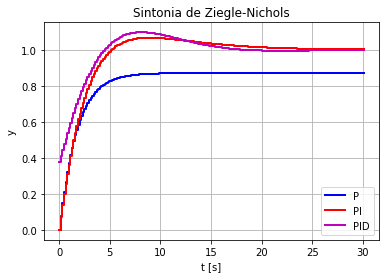

In [7]:

#-----  Projeto do controlador ------

# Sintonia por Ziegler-Nichols
Kp = np.array([(TD*K)/T1, 1, 0.9, 1.2])*T1/(TD*K)
Ti = np.array([0,         0, 3.3,   2])*TD
Td = np.array([0,         0,   0, 0.5])*TD

control = ['Kp = 1', 'P', 'PI', 'PID']
pssInf  = []
timeUp  = []
error   = []

for i in range(1,len(control)):
    print(15*'-'+f'Controlador: {control[i]}'+15*'-')
    print(f'Kp = {round(Kp[i],3)} | Ti = {round(Ti[i],3)} | Td = {round(Td[i],3)}\n')

    s = m.tf('s')
    Cs = Kp[i]*(1+ Td[i]*s + (1/(Ti[i]*s) if Ti[i] != 0 else 0) )
    Gsma = Cs*Gs

    print(f'C(s) = {Cs}')
    print(f'Gma(s) = {Gsma}')

    Gzma = m.c2d(Gsma,Tsf, 'zoh')
    Gzmf = m.feedback(Gzma, 1)

    print(f'Gma(z) = {Gzma}')
    print(f'Gmf(z) = {Gzmf}')

    y,t = m.step(Gzmf,30, X0 = 0)
    plt.step(t,y, color[i], where = 'post', label = control[i], linewidth = 2)

    # Step-Response Characteristics
    stInf = m.stepinfo(Gzmf, 30)
    pssInf.append(stInf['Overshoot'])
    timeUp.append(stInf['RiseTime'])
    error.append(abs(1 - stInf['SteadyStateValue']))


plt.title('Sintonia de Ziegle-Nichols')
plt.xlabel('t [s]')
plt.ylabel('y')

plt.grid()
plt.legend()
if not Path(IMAGES, 'comp_ZN.png').exists():
        plt.savefig(f'{IMAGES}/comp_ZN.png', dpi=720, format = 'png')
plt.show()


In [8]:
#------- Análise dos Controladores -------
for i in range(1, len(control)):
    print(15*'-'+f'Controlador: {control[i]}'+15*'-')
    print(f'Pss\t= {round(pssInf[i-1],3)} %')
    print(f'Ess\t= {round(error[i-1]*100,3)} %')
    print(f'Tr\t= {round(timeUp[i-1],3)} s\n')


---------------Controlador: P---------------
Pss	= 0 %
Ess	= 12.903 %
Tr	= 3.55 s

---------------Controlador: PI---------------
Pss	= 6.688 %
Ess	= 0.0 %
Tr	= 3.55 s

---------------Controlador: PID---------------
Pss	= 9.746 %
Ess	= 0.0 %
Tr	= 3.241 s



#### 3.2 Ajuste do PID de Ziegle-Nichols

In [9]:
# Requisitos de Projeto
sobrepassagem = 5               # [%]
erro_regime_permanente = 2      # [%]
tempo_subida = Trz             

# Valores de Ziegle-Nichols
Kpz = Kp[-1]
Tiz = Ti[-1]
Tdz = Td[-1]

# Varredura dos requisitos
base_vector = np.linspace(0,4,10)
Kpvet = base_vector * T1/(TD*K) + 0.1 
Tivet = base_vector * TD
Tdvet = base_vector * TD

VK, VI, VD, EEE, PSS, TTS = [],[],[],[],[],[]

foo = False
for kp in  Kpvet:
    for ti in Tivet:
        for td in Tdvet:
            s = m.tf('s')
            Cs = kp*(1+ td*s + (1/(ti*s) if ti != 0 else 0) )
            Gsma = Cs*Gs
            
            Gzma = m.c2d(Gsma,Tsf, 'zoh')
            Gzmf = m.feedback(Gzma, 1)
            
            stInf = m.stepinfo(Gzmf, 30)
            pss = stInf['Overshoot']
            tsub = stInf['RiseTime']
            erro = abs(1 - stInf['SteadyStateValue']) * 100
            
            if not foo:
                foo = True
                pw = (kp, ti, td, erro, pss, tsub)
                
            if (pss < sobrepassagem and erro < erro_regime_permanente and tsub < tempo_subida):
                VK.append(kp)
                VI.append(ti)
                VD.append(td)
                EEE.append(erro)
                PSS.append(pss)
                TTS.append(tsub)
            
            if erro == 0:
                if pss < pw[4]:
                    pw = (kp, ti, td, erro, pss, tsub)
              

%(best)  : Kp=0.271, Ti=7.111, Td=0.889 | p = 35.391, d = 3.113, Erro = 0.000%, Pss = 4.240% Tr = 3.550s
ABS(best): Kp=0.614, Ti=4.444, Td=0.889 | p = 62.551, d = 0.597, Erro = 0.000%, Pss = 4.583% Tr = 1.852s


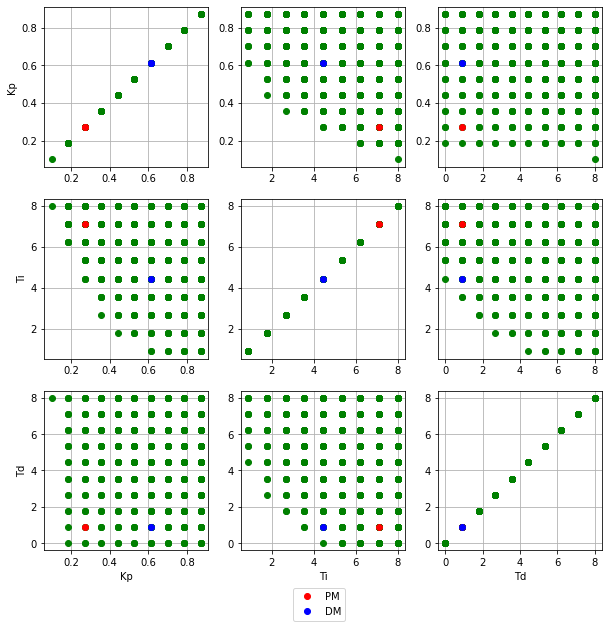

In [10]:
REF = [Kpz, Tiz, Tdz]

d = lambda A, ref: ((A[0]-ref[0])**2 + (A[1]-ref[1])**2 + (A[2]-ref[2])**2)**0.5
p = lambda A, ref: 100*( abs(A[0]-ref[0])/ref[0] + abs(A[1]-ref[1])/ref[1] + abs(A[2]-ref[2])/ref[2] )/3

distp = []
distd = []
for kp, ti, td in zip(VK,VI,VD):
    distp.append(p([kp, ti, td], REF))
    distd.append(d([kp, ti, td], REF))

ip = distp.index(min(distp))
id = distd.index(min(distd))
p_best = [ VK[ip], VI[ip], VD[ip] ] 
d_best = [ VK[id], VI[id], VD[id] ]
Kp_adj = [p_best[0], d_best[0]]
Ti_adj = [p_best[1], d_best[1]]
Td_adj = [p_best[2], d_best[2]]
print(f'%(best)  : Kp={p_best[0]:.3f}, Ti={p_best[1]:.3f}, Td={p_best[2]:.3f} | p = {p(p_best,REF):.3f}, d = {d(p_best,REF):.3f}, Erro = {EEE[ip]:.3f}%, Pss = {PSS[ip]:.3f}% Tr = {TTS[ip]:.3f}s')
print(f'ABS(best): Kp={d_best[0]:.3f}, Ti={d_best[1]:.3f}, Td={d_best[2]:.3f} | p = {p(d_best,REF):.3f}, d = {d(d_best,REF):.3f}, Erro = {EEE[id]:.3f}%, Pss = {PSS[id]:.3f}% Tr = {TTS[id]:.3f}s')

with plt.rc_context({'figure.figsize':(10,10)}):
    fig, axes = plt.subplots(3, 3)
    comb = combinations_with_replacement([0, 1, 2], 2)
    term = [VK,VI,VD]
    label = ['Kp', 'Ti', 'Td']
    for i,j in comb:
        axes[i,j].plot(term[j], term[i], 'go')
        axes[i,j].plot(p_best[j], p_best[i], 'ro')
        axes[i,j].plot(d_best[j], d_best[i], 'bo')
        axes[i,j].grid()
        if i == 0:
            axes[j,i].set_ylabel(label[j])
            axes[2,j].set_xlabel(label[j])

        if i != j:
            axes[j,i].plot(term[i], term[j], 'go')
            axes[j,i].plot(p_best[i], p_best[j], 'ro')
            axes[j,i].plot(d_best[i], d_best[j], 'bo')
            axes[j,i].grid()
    axes[0,0].plot(p_best[0], p_best[0], 'ro',label='PM')
    axes[0,0].plot(d_best[0], d_best[0], 'bo',label='DM')
    fig.legend(bbox_to_anchor = (0.55, 0.08)) 
    if not Path(IMAGES, 'comb_graph.png').exists():
        fig.savefig(f'{IMAGES}/comb_graph.png', dpi=720, format = 'png', bbox_inches = 'tight')
    plt.show()

---------------Controlador: PID ZN---------------
Kp = 0.231 | Ti = 4.0 | Td = 1.0

C(s) = 
0.9257 s^2 + 0.9257 s + 0.2314
------------------------------
             4 s

Gmf(z) = 
0.6 z^2 - 1.106 z + 0.5097
--------------------------
1.6 z^2 - 3.095 z + 1.498

dt = 0.15432771736786133

Pss	= 9.746 %
Tr	= 3.241 s
Ess	= 0.0 %

---------------Controlador: PID PM---------------
Kp = 0.271 | Ti = 7.111 | Td = 0.889

C(s) = 
1.716 s^2 + 1.93 s + 0.2714
---------------------------
          7.111 s

Gmf(z) = 
0.6255 z^2 - 1.142 z + 0.5187
-----------------------------
 1.626 z^2 - 3.131 z + 1.507

dt = 0.15432771736786133

Pss	= 4.24 %
Tr	= 3.55 s
Ess	= 0.0 %

---------------Controlador: PID ZN DM---------------
Kp = 0.614 | Ti = 4.444 | Td = 0.889

C(s) = 
2.427 s^2 + 2.73 s + 0.6143
---------------------------
          4.444 s

Gmf(z) = 
1.416 z^2 - 2.583 z + 1.175
---------------------------
2.416 z^2 - 4.571 z + 2.164

dt = 0.15432771736786133

Pss	= 4.583 %
Tr	= 1.852 s
Ess	= 0.0 %



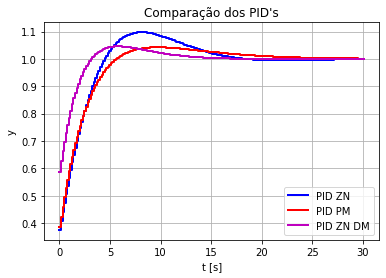

In [11]:
PID = ['PID ZN', 'PID PM', 'PID ZN DM']
KP  = [Kp[-1]]+Kp_adj
TI  = [Ti[-1]]+Ti_adj
TD  = [Td[-1]]+Td_adj

num, den = m.pade(T = 2)
for i in range(len(PID)):
    print(15*'-'+f'Controlador: {PID[i]}'+15*'-')
    print(f'Kp = {round(KP[i],3)} | Ti = {round(TI[i],3)} | Td = {round(TD[i],3)}\n')

    s = m.tf('s')
    Cs =KP[i]*(1+ TD[i]*s + 1/(TI[i]*s) )
    Gsma = Cs*Gs
    
    print(f'C(s) = {Cs}')

    Gzma = m.c2d(Gsma,Tsf, 'zoh')
    Gzmf = m.feedback(Gzma, 1)

    print(f'Gmf(z) = {Gzmf}')
    
    y,t = m.step(Gzmf,30, X0 = 0)
    plt.step(t,y, color[i+1], where = 'post', label = PID[i], linewidth = 2)

    # Step-Response Characteristics
    stInf = m.stepinfo(Gzmf, 30)
    print(f"Pss\t= {round(stInf['Overshoot'],3)} %")
    print(f"Tr\t= {round(stInf['RiseTime'],3)} s")
    print(f"Ess\t= {round(abs(1 - stInf['SteadyStateValue'])*100,3)} %\n")

plt.title("Comparação dos PID's")
plt.xlabel('t [s]')
plt.ylabel('y')

plt.grid()
plt.legend()
if not Path(IMAGES, 'comp_PIDs.png').exists():
        plt.savefig(f'{IMAGES}/comp_PIDs.png', dpi=720, format = 'png')
plt.show()


#### 3.3 Controlador Dahlin

---------------a = 2 s---------------
D(z) = 
      0.01137 z^5 - 0.01124 z^4
--------------------------------------
0.3978 z^7 - 0.3933 z^6 - 0.004522 z^4

dt = 0.15432771736786133

Gmf(z) = 
    0.004522 z^5 - 0.004471 z^4
------------------------------------
0.3978 z^8 - 0.7866 z^7 + 0.3888 z^6

dt = 0.15432771736786133

Pss	= 0 %
Tr	= 29.631 s
Ess	= 0.0 %

---------------a = 0 s---------------
D(z) = 
0.01137 z^3 - 0.01124 z^2
-------------------------
 0.3978 z^3 - 0.3978 z^2

dt = 0.15432771736786133

Gmf(z) = 
    0.004522 z^3 - 0.004471 z^2
------------------------------------
0.3978 z^4 - 0.7866 z^3 + 0.3888 z^2

dt = 0.15432771736786133

Pss	= 0 %
Tr	= 29.631 s
Ess	= 0.0 %



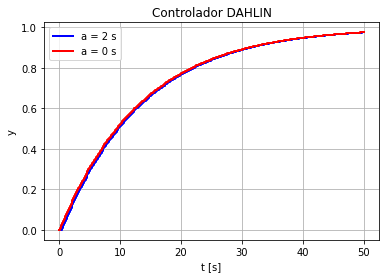

In [12]:
q = 13.5
K = [2, 0]
for i,k in enumerate(K): 
    print(15*'-'+f'a = {2 if k!=0 else 0} s'+15*'-')
    z = m.tf('z')
    Dz = 1/Gz * z**(-k-1)*(1 - np.exp(-Tsf/q))/( 1- np.exp(-Tsf/q)*z**(-1) - (1 - np.exp(-Tsf/q))*z**(-k-1) )
    
    print(f'D(z) = {Dz}')

    Gzmf = m.feedback(Dz*Gz,1)
    print(f'Gmf(z) = {Gzmf}')

    y,t = m.step(Gzmf,50)
    plt.step(t,y, color[i+1], where = 'post', linewidth = 2, label = f'a = {2 if k!=0 else 0} s')

    # Step-Response Characteristics
    stInf = m.stepinfo(Gzmf, 70)
    print(f"Pss\t= {round(stInf['Overshoot'],3)} %")
    print(f"Tr\t= {round(stInf['RiseTime'],3)} s")    

    print(f"Ess\t= {round(abs(1 - stInf['SteadyStateValue'])*100,3)} %\n")


plt.title("Controlador DAHLIN")
plt.xlabel("t [s]")
plt.ylabel("y")
plt.grid()
plt.legend()
if not Path(IMAGES, 'DAHLIN.png').exists():
        plt.savefig(f'{IMAGES}/DAHLIN.png', dpi=720, format = 'png')
plt.show()

#### 3.4 Comparação entre controladores

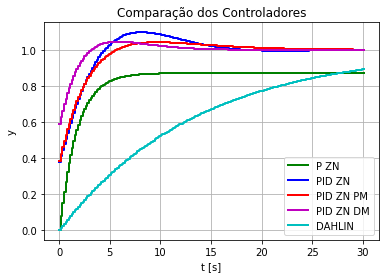

In [15]:
CONTROL = ['P ZN','PID ZN', 'PID ZN PM', 'PID ZN DM', 'DAHLIN']
KP      = [Kp[1],Kp[-1]]+Kp_adj
TI      = [Ti[1],Ti[-1]]+Ti_adj
TD      = [Td[1],Td[-1]]+Td_adj

for i in range(len(CONTROL)):
    if CONTROL[i] != 'DAHLIN':
        s = m.tf('s')
        Cs =KP[i]*(1+ TD[i]*s + (1/(TI[i]*s) if TI[i] !=0 else 0 ))
        Gsma = Cs*Gs
        Gzma = m.c2d(Gsma,Tsf, 'zoh')
    else:
        k = K[1]
        Dz = 1/Gz * z**(-k-1)*(1 - np.exp(-Tsf/q))/( 1- np.exp(-Tsf/q)*z**(-1) - (1 - np.exp(-Tsf/q))*z**(-k-1) )
        Gzma = Dz*Gz

    Gzmf = m.feedback(Gzma, 1)
    
    y,t = m.step(Gzmf,30, X0 = 0)
    plt.step(t,y, color[i], where = 'post', label = CONTROL[i], linewidth = 2)

plt.title("Comparação dos Controladores")
plt.xlabel('t [s]')
plt.ylabel('y')

plt.grid()
plt.legend()
if not Path(IMAGES, 'comp_control.png').exists():
        plt.savefig(f'{IMAGES}/comp_control.png', dpi=720, format = 'png')
plt.show()


# Questão 5

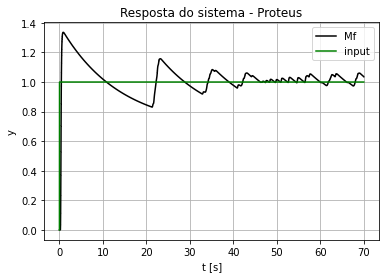

In [28]:
# Plot do Proteus
t, ymf, deg = np.loadtxt("dado.DAT", skiprows = 1, delimiter = ',',unpack = True)

plt.step(t, ymf, 'k', where = 'post', label = 'Mf')
plt.plot(t, deg,'g', label = 'input')

plt.title('Resposta do sistema - Proteus')
plt.xlabel('t [s]')
plt.ylabel('y')

plt.legend()
plt.grid()

if not Path(IMAGES, 'proteus.png').exists():
        plt.savefig(f'{IMAGES}/proteus.png', dpi=720, format = 'png')
plt.show()
